In [1]:
import pandas as pd
import numpy as np

import sqlite3
import pymysql
pymysql.install_as_MySQLdb()
import MySQLdb
import sqlalchemy

## seaborn
import seaborn as sns
sns.set_context('paper', rc={'font.size':12,'axes.titlesize':14,'axes.labelsize':12})
sns.set_style('white')

## matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
import matplotlib.gridspec as gridspec
import matplotlib.colors
from pylab import rcParams
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = 14, 8
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-success"><font size="+3"><b>
Reading and Writing Table using Pandas DataFrame
</b></font></div>

To demonstrate this, we can read [**Premier League Player Stats**](https://www.premierleague.com/stats/top/players/goals?se=274) Table. This can be done as follows,

In [2]:
Player_Stats = pd.read_html('https://www.premierleague.com/stats/top/players/goals?se=274')
Player_Stats = pd.concat(Player_Stats)
Player_Stats.rename(columns = {'Stat': 'Goals'}, inplace = True)
display(Player_Stats)

,Rank,Player,Club,Nationality,Goals
0,1,Alan Shearer,-,England,260
1,2,Wayne Rooney,-,England,208
2,3,Andrew Cole,-,England,187
3,4,Sergio Agüero,Manchester City,Argentina,180
4,5,Frank Lampard,-,England,177
5,6,Thierry Henry,-,France,175
6,7,Robbie Fowler,-,England,163
7,8,Jermain Defoe,-,England,162
8,9,Michael Owen,-,England,150
9,10,Les Ferdinand,-,England,149


To insert this table into SQL, we can follow the instruction available from  [Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_sql.html). Moreover, we need to create a SQL [engine](https://www.sqlalchemy.org/). This can be done as follows.

In [3]:
Engine = sqlalchemy.create_engine('sqlite:///premierleague.db')
#PL.to_sql('PL', engine)
Player_Stats.to_sql('Goals', Engine, if_exists='replace')

To verify we result, we can run a SQL query.

In [4]:
Engine.execute("SELECT * FROM Goals").fetchall()

[(0, 1, 'Alan Shearer', '-', 'England', 260),
 (1, 2, 'Wayne Rooney', '-', 'England', 208),
 (2, 3, 'Andrew Cole', '-', 'England', 187),
 (3, 4, 'Sergio Agüero', 'Manchester City', 'Argentina', 180),
 (4, 5, 'Frank Lampard', '-', 'England', 177),
 (5, 6, 'Thierry Henry', '-', 'France', 175),
 (6, 7, 'Robbie Fowler', '-', 'England', 163),
 (7, 8, 'Jermain Defoe', '-', 'England', 162),
 (8, 9, 'Michael Owen', '-', 'England', 150),
 (9, 10, 'Les Ferdinand', '-', 'England', 149),
 (10, 11, 'Teddy Sheringham', '-', 'England', 146),
 (11, 12, 'Robin van Persie', '-', 'Netherlands', 144),
 (12, 13, 'Harry Kane', 'Tottenham Hotspur', 'England', 136),
 (13, 14, 'Jimmy Floyd Hasselbaink', '-', 'Netherlands', 127),
 (14, 15, 'Robbie Keane', '-', 'Ireland', 126),
 (15, 16, 'Nicolas Anelka', '-', 'France', 125),
 (16, 17, 'Dwight Yorke', '-', 'Trinidad And Tobago', 123),
 (17, 18, 'Steven Gerrard', '-', 'England', 120),
 (18, 19, 'Romelu Lukaku', '-', 'Belgium', 113),
 (19, 19, 'Ian Wright', '-', '

We also can read this Table using [SQLite](https://www.sqlite.org/index.html).

In [5]:
connection = sqlite3.connect("premierleague.db")
cursor = connection.cursor()
cursor.execute("SELECT * FROM Goals") 
print("All rows:")
result = cursor.fetchall() 
for row in result:
    print(row)
del row
connection.close()

All rows:
(0, 1, 'Alan Shearer', '-', 'England', 260)
(1, 2, 'Wayne Rooney', '-', 'England', 208)
(2, 3, 'Andrew Cole', '-', 'England', 187)
(3, 4, 'Sergio Agüero', 'Manchester City', 'Argentina', 180)
(4, 5, 'Frank Lampard', '-', 'England', 177)
(5, 6, 'Thierry Henry', '-', 'France', 175)
(6, 7, 'Robbie Fowler', '-', 'England', 163)
(7, 8, 'Jermain Defoe', '-', 'England', 162)
(8, 9, 'Michael Owen', '-', 'England', 150)
(9, 10, 'Les Ferdinand', '-', 'England', 149)
(10, 11, 'Teddy Sheringham', '-', 'England', 146)
(11, 12, 'Robin van Persie', '-', 'Netherlands', 144)
(12, 13, 'Harry Kane', 'Tottenham Hotspur', 'England', 136)
(13, 14, 'Jimmy Floyd Hasselbaink', '-', 'Netherlands', 127)
(14, 15, 'Robbie Keane', '-', 'Ireland', 126)
(15, 16, 'Nicolas Anelka', '-', 'France', 125)
(16, 17, 'Dwight Yorke', '-', 'Trinidad And Tobago', 123)
(17, 18, 'Steven Gerrard', '-', 'England', 120)
(18, 19, 'Romelu Lukaku', '-', 'Belgium', 113)
(19, 19, 'Ian Wright', '-', 'England', 113)


Furthermore, the table can be read using Pandas [read_sql_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql_table.html#pandas.read_sql_table) function.

,index,Rank,Player,Club,Nationality,Goals
0,0,1,Alan Shearer,-,England,260
1,1,2,Wayne Rooney,-,England,208
2,2,3,Andrew Cole,-,England,187
3,3,4,Sergio Agüero,Manchester City,Argentina,180
4,4,5,Frank Lampard,-,England,177


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        20 non-null     int64 
 1   Rank         20 non-null     int64 
 2   Player       20 non-null     object
 3   Club         20 non-null     object
 4   Nationality  20 non-null     object
 5   Goals        20 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.1+ KB


None

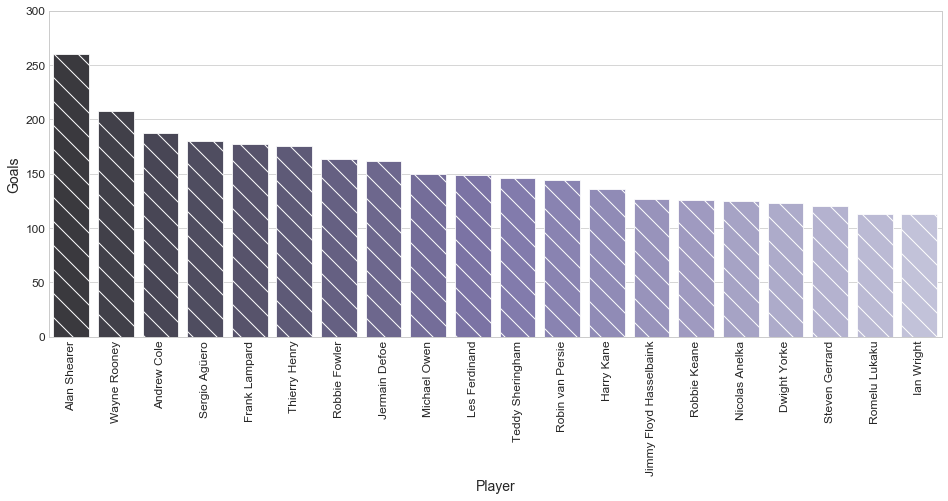

In [6]:
Engine = sqlalchemy.create_engine('sqlite:///premierleague.db')
df = pd.read_sql_table('Goals', Engine, index_col=None)
display(df.head())
display(df.info(memory_usage = True, null_counts = True))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6), sharex = True)
_ = sns.barplot(x="Player", y="Goals", palette="Purples_d", hatch = '\\', data = df, ax = ax)
_ = ax.set_ylim([0,300])
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

***